In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

p1 = pd.read_csv('/content/drive/My Drive/jan_lmp.csv')
p2 = pd.read_csv('/content/drive/My Drive/feb_lmp.csv')
p3 = pd.read_csv('/content/drive/My Drive/mar_lmp.csv')
p4 = pd.read_csv('/content/drive/My Drive/apr_lmp.csv')
p5 = pd.read_csv('/content/drive/My Drive/may_lmp.csv')
p6 = pd.read_csv('/content/drive/My Drive/jun_lmp.csv')
p7 = pd.read_csv('/content/drive/My Drive/jul_lmp.csv')
p8 = pd.read_csv('/content/drive/My Drive/aug_lmp.csv')
p9 = pd.read_csv('/content/drive/My Drive/sep_lmp.csv')
p10 = pd.read_csv('/content/drive/My Drive/oct_lmp.csv')
p11 = pd.read_csv('/content/drive/My Drive/nov_lmp.csv')
p12 = pd.read_csv('/content/drive/My Drive/dec_lmp.csv')
merged_df = pd.concat([p1, p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12], ignore_index=True)


In [ ]:
for i,row in mappings.iterrows():
  df = pd.read_csv('/content/drive/My Drive/final gen data/'+str(row['EIA ID'])+'.csv')
  df = df.rename(columns={'Unnamed: 0': 'datetime'})
  df['datetime_no_year']= df['datetime'].apply(lambda x: x[5:])
  df['year'] = df['datetime'].apply(lambda x: x[0:4])
  df['EnergyPred'] = 0
  df['EnergyPred'] = df.groupby('datetime_no_year')['gen_clean'].transform(lambda x: x.shift(1).expanding().mean())
  df['EnergyPred'].fillna(0, inplace=True)
  df.to_csv('/content/drive/My Drive/'+str(row['EIA ID'])+'_mod.csv')


In [3]:
df = pd.read_csv('/content/drive/My Drive/'+str(57522)+'_mod.csv')
df_2022 = df[df['year']==2022][8:]
energyProd = df_2022['gen_clean'].values
energyPred = df_2022['EnergyPred'].values
price_data = merged_df[merged_df["XML_DATA_ITEM"] == "LMP_PRC"]
price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
prices = price_data[price_data['NODE_ID'] == 'CANTGEN_7_N002']['MW'].values

In [ ]:
 # Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial linear program.
n = len(prices)

qt_d = cp.Variable(n)
qt_r = cp.Variable(n)
s_t = cp.Variable(n)
prob1 = prices.T@qt_d
prob2 = prices.T@qt_r
prob3 = prices.T@(energyProd)
qr_hat = 15
qd_hat = 15
s_hat = 60

consts2 = [s_t[i] == 0.99*s_t[i - 1] + 0.95 *  qt_r[i] - qt_d[i] for i in range(1, n)
       ] + [s_t[i] == 0 for i in range(0, n, 24)
       ] + [qt_r[i] <= energyProd[i] for i in range(0, n)
       ] + [qt_d[i] *prices[i] >= 0 for i in range(0, n)
       ] + [s_t <= s_hat,
          s_t[0] == 0,
          0 <= s_t,
          qt_r <= qr_hat,
          0 <= qt_r,
          qt_d <= qd_hat,
          0 <= qt_d,
          qt_d[0]==0]


prob = cp.Problem(cp.Maximize(prob1-prob2 +prob3),
                 consts2)
prob.solve()

3327714.1476044916

In [ ]:
node

'BIGSKGN1_7_N001'

In [ ]:
mappings = pd.read_csv('/content/drive/My Drive/mappings140.csv')

In [ ]:
import cvxpy as cp
import numpy as np
for m, row in mappings.iterrows():
  if m !=122:
    continue
  elif m > 160:
    break
  elif row['Nodes'] == 'AQUAWS_2_AQWSR1-APND':
    continue
  elif row['Nodes'] == 'BIOMSJCT_6_GN001':
    break
  df = pd.read_csv('/content/drive/My Drive/'+str(row['EIA ID'])+'_mod.csv')
  df_2022 = df[df['year']==2022][8:]
  energyProd = df_2022['gen_clean'].values
  energyPred = df_2022['EnergyPred'].values
  price_data = merged_df[merged_df["XML_DATA_ITEM"] == "LMP_PRC"]
  price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
  prices = price_data[price_data['NODE_ID'] == row['Nodes']]['MW'].values

  off = 0
  s_t_final = [0 for i in range(len(prices))]
  qt_r_final = [0 for i in range(len(prices))]
  qt_d_final = [0 for i in range(len(prices))]
  while off+24 < len(prices):
    n = 24
    qt_d = cp.Variable(n)
    qt_r = cp.Variable(n)
    s_t = cp.Variable(n)
    prob1 = prices[0+off:24+off].T@qt_d
    prob2 = prices[0+off:24+off].T@qt_r
    prob3 = prices[0+off:24+off].T@(energyPred[0+off:24+off])
    qr_hat = 15
    qd_hat = 15
    s_hat = 60
    consts2 = [s_t[i] == 0.99*s_t[i - 1] + 0.95 *  qt_r[i] - qt_d[i] for i in range(1, n)
          ] + [s_t[i] == 0 for i in range(0, n, 24)
          ] + [qt_r[i] <= energyPred[i+off] for i in range(0, n)
          ] + [qt_d[i] *(prices[i+off]-0.01) >= 0 for i in range(0, n)
          ] + [s_t <= s_hat,
              s_t[0] == 0,
              0 <= s_t,
              qt_r <= qr_hat,
              0 <= qt_r,
              qt_d <= qd_hat,
              0 <= qt_d,
              qt_d[0] == 0]


    prob = cp.Problem(cp.Maximize(prob1-prob2 +prob3),
                    consts2)
    prob.solve(solver=cp.SCS)

    k = 0
    for j in range(24):
      if qt_r.value[j-k] <= energyProd[j+off]+0.001:
        s_t_final[j+off] = s_t.value[j-k]
        qt_r_final[j+off] = qt_r.value[j-k]
        qt_d_final[j+off] = qt_d.value[j-k]
      else:
        qt_r_final[j+off] = energyProd[j+off]
        qt_d_final[j+off] = qt_d.value[j-k]
        s_t_final[j+off] = 0.99*s_t_final[j+off-1] + 0.95 * qt_r_final[j+off] - qt_d_final[j+off]
        qt_d = cp.Variable(n-j)
        qt_r = cp.Variable(n-j)
        s_t = cp.Variable(n-j)
        prob1 = prices[j+off:24+off].T@qt_d
        prob2 = prices[j+off:24+off].T@qt_r
        prob3 = prices[j+off:24+off].T@(energyPred[j+off:24+off])

        consts2 = [s_t[i] == 0.99*s_t[i - 1] + 0.95 *  qt_r[i] - qt_d[i] for i in range(1, n-j)
          ] + [s_t[n-j-1] == 0
          ] + [qt_r[i] <= energyPred[j+i+off] for i in range(0, n-j)
          ] + [qt_d[i] *(prices[i+j+off]-0.01) >= 0 for i in range(0, n-j)
          ] + [s_t <= s_hat,
              s_t[0] == s_t_final[j+off],
              qt_r[0] == qt_r_final[j+off],
              qt_d[0] == qt_d_final[j+off],
              0 <= s_t,
              qt_r <= qr_hat,
              0 <= qt_r,
              qt_d <= qd_hat,
              0 <= qt_d]

        prob = cp.Problem(cp.Maximize(prob1-prob2 +prob3),
                    consts2)
        prob.solve(solver=cp.SCS)
        k = j
    off += 24
  print(prices.T@(qt_d_final) - prices.T@qt_r_final + prices.T@energyProd)
  mappings.loc[mappings['Project Name'] == row['Project Name'], 'predictive_value'] = prices.T@(qt_d_final) - prices.T@qt_r_final + prices.T@energyProd
  if m%5 == 0:
    mappings.to_csv('/content/drive/My Drive/mappings'+str(m)+'.csv')

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


TypeError: 'NoneType' object is not subscriptable

In [ ]:
for m, row in mappings.iterrows():
  if m == 7:
    continue
  if m >157:
    break
  df = pd.read_csv('/content/drive/My Drive/'+str(row['EIA ID'])+'_mod.csv')
  df_2022 = df[df['year']==2022][8:]
  energyProd = df_2022['gen_clean'].values
  energyPred = df_2022['EnergyPred'].values
  price_data = merged_df[merged_df["XML_DATA_ITEM"] == "LMP_PRC"]
  price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
  prices = price_data[price_data['NODE_ID'] == row['Nodes']]['MW'].values
  mappings.loc[mappings['Project Name'] == row['Project Name'], 'standard_value'] = prices.T@energyProd


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/66331_mod.csv'

In [ ]:
mappings.to_csv('/content/drive/My Drive/mappings_final.csv')

In [ ]:
price_data[price_data['NODE_ID'] == row['Nodes']][3576+j-1
                                                  +14:]
mappings.to_csv('mappings_final')

In [ ]:
#3years of price data
import time
import requests
year = 2021
merged_df = pd.DataFrame()
for i in range(3, 13,1):
    print(i)
    if i<9:
      url = 'http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP&version=12&startdatetime='+str(year)+'0'+str(i)+'01T08:00-0000&enddatetime='+str(year)+'0'+str(i+1)+'01T08:00-0000&market_run_id=DAM&node=0096WD_7_N001,24017_BLYTHESC_161_GUS1,2C559EQ2_7_N001,2C577C1_7_N001,2PBLSM34_7_N001,ACACIA_7_N001,ADERAG1_7_N001,AQUAWS_2_AQWSR1-APND,ARLNG2MV_7_N001,ASTORIA1_7_N001,ASTORIA2_7_N001,AVENGEN_7_N001,AVLYSLR_7_N005,BGSKYGN3_7_N001,BGSKYGN3_7_N001,BIGSK230_2_N025,BIGSK230_2_N025,BIGSK230_2_N025,BIGSKGN1_7_N001,BIGSKGN6_7_N001,BLACKWLL_7_N002,BLUESKY_7_N001,BLYTHESC_1_N008,BLYTHESC_1_N008,BORREGO_6_N009,BSKYNGSU_2_N002,BSKYNPM_7_N001,BSKYNPM_7_N003,BSKYNPM_7_N004,BSKYNPM_7_N004,BSKYNPM_7_N005,BUCKWND_1_N201,GARNET_7_N008,C643TM1_7_N001,CABALLO3_7_N001,CANTGEN_7_N002,CATALNA2_7_N001,CAVLSRGN_7_B1,CENT403_7_N006,CENTANTE_7_N001,COLCT334_7_N001,COPUS_6_N001,CORCRAN2_7_N001,DAVIS_1_N030,DAWNLS_7_N001,DEVERS_1_N102,DEVERS_1_N103,DEVERS_2_N072,DMDVLY_1_UNITS-APND,DRYRANCH_7_N001,DUCORGN1_7_N001,DUCORGN2_7_N001,DUCORGN3_7_N001,DUCORGN4_7_N001,FBERBORD_1_N001,FNTRG1_7_N001,FRWTG1_7_N001,GASKW1B2_7_N003,GASLRAGN_7_N001,GASLRGN_7_N001,GATESBK4_7_N002,GATESBK4_7_N003,GIFFGEN_7_N001,GIFFGEN_7_N002,GIFFGEN_7_N002,GLDTGEN_7_N003,GNS1_7_B1,GUERSEY_7_N001,HENRTGEN_7_N001,HIDSRT_2_UNITS-APND,HURONGEN_7_ND002,INYOKERN_1_N008,ISIS_7_N002,KANSASGN_7_N002,LAMONT_1_N002,LEMORSLR_7_N003,LNGBATGN_7_N001,LOCKFORD_7_N004,LSQ855_7_N001,MAGUNDEN_1_N006,MESQSLR2_7_N002,MSOLGEN3_7_N003,NLANCRAN_7_N001,OASISG2_7_N001,OROLMGN_7_N005,PMPJKG2_7_N001,PNCHVS_2_SOLAR-APND,PTSB6_7_B2,Q1032C2_7_N001,Q442GEN_7_N005,Q442GEN_7_N012,Q482_7_N001,Q532C2_7_N001,Q548_7_N001,Q557_7_N005,Q620_7_N001,Q633C1_7_N001,Q643WC2_7_N001,Q643XC2_7_N001,Q644A2_7_N001,Q653B_7_N001,Q723EQ2_7_N001,Q965C2_7_N001,Q972GEN_7_N001,RICHMOND_1_GN001,RTEDDYG3_7_N003,RVRBANK_1_N010,S0479_7_N003,S473_7_N005,S621AC_7_N001,S621AC_7_N002,S622B_7_N003,S654_7_N001,SCHLNDLR_7_N002,SCHLNDLR_7_N002,SCHLNDLR_7_N003,SGSAVF1_7_N001,SGSAVF2_7_N001,SLATE_7_N001,SLSTR1_2_SOLAR1-APND,SLSTR2_2_SOLAR2-APND,STHKERN_7_N001,STROUD_6_N003,SUB434_7_N001,SUNRAY2_7_N001,SUNRAYGN_7_N001,SUNSPTA_7_N002,T0304_7_N003,TITANS34_7_N001,TOT427A_7_N001,TOT545L_7_N001,TWILGHTL_7_N001,VALTNEGN_7_N002,VALTNEGN_7_N003,VESTAL_6_N025,VICTOR_7_GN002,VICTOR_7_N008,VICTOR_7_N002,VICTOR_7_N006,VICTOR_7_N007,VICTOR_7_N009,VICTOR_7_N010,VICTOR_7_N011,WAUKENA_7_N003,WDT404L_7_N001,WLDWDG2_7_N001,WNSTRGN1_7_N001,WRGTSRGN_7_N001,BSKYNPM_7_N001,PURISIMA_1_N001,BSKYNPM_7_N001,PEWWOOD_7_B1,LSTHLLS_6_N001,OBERON_7_N182,OBERON_7_N182,24017_BLYTHESC_161_GUS1,24017_BLYTHESC_161_GUS1,LERDO_1_N004,ANTELOPE_6_N001,OBERON_7_N182,OBERON_7_N182,BIOMSJCT_6_GN001,BSKYNPM_7_N005,VALTNEGN_7_N002,Q442GEN_7_N012​,DSRTHV3_7_N003'
    elif i == 9:
      url = 'http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP&version=12&startdatetime='+str(year)+'0901T08:00-0000&enddatetime='+str(year)+'1001T08:00-0000&market_run_id=DAM&node=0096WD_7_N001,24017_BLYTHESC_161_GUS1,2C559EQ2_7_N001,2C577C1_7_N001,2PBLSM34_7_N001,ACACIA_7_N001,ADERAG1_7_N001,AQUAWS_2_AQWSR1-APND,ARLNG2MV_7_N001,ASTORIA1_7_N001,ASTORIA2_7_N001,AVENGEN_7_N001,AVLYSLR_7_N005,BGSKYGN3_7_N001,BGSKYGN3_7_N001,BIGSK230_2_N025,BIGSK230_2_N025,BIGSK230_2_N025,BIGSKGN1_7_N001,BIGSKGN6_7_N001,BLACKWLL_7_N002,BLUESKY_7_N001,BLYTHESC_1_N008,BLYTHESC_1_N008,BORREGO_6_N009,BSKYNGSU_2_N002,BSKYNPM_7_N001,BSKYNPM_7_N003,BSKYNPM_7_N004,BSKYNPM_7_N004,BSKYNPM_7_N005,BUCKWND_1_N201,GARNET_7_N008,C643TM1_7_N001,CABALLO3_7_N001,CANTGEN_7_N002,CATALNA2_7_N001,CAVLSRGN_7_B1,CENT403_7_N006,CENTANTE_7_N001,COLCT334_7_N001,COPUS_6_N001,CORCRAN2_7_N001,DAVIS_1_N030,DAWNLS_7_N001,DEVERS_1_N102,DEVERS_1_N103,DEVERS_2_N072,DMDVLY_1_UNITS-APND,DRYRANCH_7_N001,DUCORGN1_7_N001,DUCORGN2_7_N001,DUCORGN3_7_N001,DUCORGN4_7_N001,FBERBORD_1_N001,FNTRG1_7_N001,FRWTG1_7_N001,GASKW1B2_7_N003,GASLRAGN_7_N001,GASLRGN_7_N001,GATESBK4_7_N002,GATESBK4_7_N003,GIFFGEN_7_N001,GIFFGEN_7_N002,GIFFGEN_7_N002,GLDTGEN_7_N003,GNS1_7_B1,GUERSEY_7_N001,HENRTGEN_7_N001,HIDSRT_2_UNITS-APND,HURONGEN_7_ND002,INYOKERN_1_N008,ISIS_7_N002,KANSASGN_7_N002,LAMONT_1_N002,LEMORSLR_7_N003,LNGBATGN_7_N001,LOCKFORD_7_N004,LSQ855_7_N001,MAGUNDEN_1_N006,MESQSLR2_7_N002,MSOLGEN3_7_N003,NLANCRAN_7_N001,OASISG2_7_N001,OROLMGN_7_N005,PMPJKG2_7_N001,PNCHVS_2_SOLAR-APND,PTSB6_7_B2,Q1032C2_7_N001,Q442GEN_7_N005,Q442GEN_7_N012,Q482_7_N001,Q532C2_7_N001,Q548_7_N001,Q557_7_N005,Q620_7_N001,Q633C1_7_N001,Q643WC2_7_N001,Q643XC2_7_N001,Q644A2_7_N001,Q653B_7_N001,Q723EQ2_7_N001,Q965C2_7_N001,Q972GEN_7_N001,RICHMOND_1_GN001,RTEDDYG3_7_N003,RVRBANK_1_N010,S0479_7_N003,S473_7_N005,S621AC_7_N001,S621AC_7_N002,S622B_7_N003,S654_7_N001,SCHLNDLR_7_N002,SCHLNDLR_7_N002,SCHLNDLR_7_N003,SGSAVF1_7_N001,SGSAVF2_7_N001,SLATE_7_N001,SLSTR1_2_SOLAR1-APND,SLSTR2_2_SOLAR2-APND,STHKERN_7_N001,STROUD_6_N003,SUB434_7_N001,SUNRAY2_7_N001,SUNRAYGN_7_N001,SUNSPTA_7_N002,T0304_7_N003,TITANS34_7_N001,TOT427A_7_N001,TOT545L_7_N001,TWILGHTL_7_N001,VALTNEGN_7_N002,VALTNEGN_7_N003,VESTAL_6_N025,VICTOR_7_GN002,VICTOR_7_N008,VICTOR_7_N002,VICTOR_7_N006,VICTOR_7_N007,VICTOR_7_N009,VICTOR_7_N010,VICTOR_7_N011,WAUKENA_7_N003,WDT404L_7_N001,WLDWDG2_7_N001,WNSTRGN1_7_N001,WRGTSRGN_7_N001,BSKYNPM_7_N001,PURISIMA_1_N001,BSKYNPM_7_N001,PEWWOOD_7_B1,LSTHLLS_6_N001,OBERON_7_N182,OBERON_7_N182,24017_BLYTHESC_161_GUS1,24017_BLYTHESC_161_GUS1,LERDO_1_N004,ANTELOPE_6_N001,OBERON_7_N182,OBERON_7_N182,BIOMSJCT_6_GN001,BSKYNPM_7_N005,VALTNEGN_7_N002,Q442GEN_7_N012​,DSRTHV3_7_N003'
    elif i < 12:
      url = 'http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP&version=12&startdatetime='+str(year)+''+str(i)+'01T08:00-0000&enddatetime='+str(year)+''+str(i+1)+'01T08:00-0000&market_run_id=DAM&node=0096WD_7_N001,24017_BLYTHESC_161_GUS1,2C559EQ2_7_N001,2C577C1_7_N001,2PBLSM34_7_N001,ACACIA_7_N001,ADERAG1_7_N001,AQUAWS_2_AQWSR1-APND,ARLNG2MV_7_N001,ASTORIA1_7_N001,ASTORIA2_7_N001,AVENGEN_7_N001,AVLYSLR_7_N005,BGSKYGN3_7_N001,BGSKYGN3_7_N001,BIGSK230_2_N025,BIGSK230_2_N025,BIGSK230_2_N025,BIGSKGN1_7_N001,BIGSKGN6_7_N001,BLACKWLL_7_N002,BLUESKY_7_N001,BLYTHESC_1_N008,BLYTHESC_1_N008,BORREGO_6_N009,BSKYNGSU_2_N002,BSKYNPM_7_N001,BSKYNPM_7_N003,BSKYNPM_7_N004,BSKYNPM_7_N004,BSKYNPM_7_N005,BUCKWND_1_N201,GARNET_7_N008,C643TM1_7_N001,CABALLO3_7_N001,CANTGEN_7_N002,CATALNA2_7_N001,CAVLSRGN_7_B1,CENT403_7_N006,CENTANTE_7_N001,COLCT334_7_N001,COPUS_6_N001,CORCRAN2_7_N001,DAVIS_1_N030,DAWNLS_7_N001,DEVERS_1_N102,DEVERS_1_N103,DEVERS_2_N072,DMDVLY_1_UNITS-APND,DRYRANCH_7_N001,DUCORGN1_7_N001,DUCORGN2_7_N001,DUCORGN3_7_N001,DUCORGN4_7_N001,FBERBORD_1_N001,FNTRG1_7_N001,FRWTG1_7_N001,GASKW1B2_7_N003,GASLRAGN_7_N001,GASLRGN_7_N001,GATESBK4_7_N002,GATESBK4_7_N003,GIFFGEN_7_N001,GIFFGEN_7_N002,GIFFGEN_7_N002,GLDTGEN_7_N003,GNS1_7_B1,GUERSEY_7_N001,HENRTGEN_7_N001,HIDSRT_2_UNITS-APND,HURONGEN_7_ND002,INYOKERN_1_N008,ISIS_7_N002,KANSASGN_7_N002,LAMONT_1_N002,LEMORSLR_7_N003,LNGBATGN_7_N001,LOCKFORD_7_N004,LSQ855_7_N001,MAGUNDEN_1_N006,MESQSLR2_7_N002,MSOLGEN3_7_N003,NLANCRAN_7_N001,OASISG2_7_N001,OROLMGN_7_N005,PMPJKG2_7_N001,PNCHVS_2_SOLAR-APND,PTSB6_7_B2,Q1032C2_7_N001,Q442GEN_7_N005,Q442GEN_7_N012,Q482_7_N001,Q532C2_7_N001,Q548_7_N001,Q557_7_N005,Q620_7_N001,Q633C1_7_N001,Q643WC2_7_N001,Q643XC2_7_N001,Q644A2_7_N001,Q653B_7_N001,Q723EQ2_7_N001,Q965C2_7_N001,Q972GEN_7_N001,RICHMOND_1_GN001,RTEDDYG3_7_N003,RVRBANK_1_N010,S0479_7_N003,S473_7_N005,S621AC_7_N001,S621AC_7_N002,S622B_7_N003,S654_7_N001,SCHLNDLR_7_N002,SCHLNDLR_7_N002,SCHLNDLR_7_N003,SGSAVF1_7_N001,SGSAVF2_7_N001,SLATE_7_N001,SLSTR1_2_SOLAR1-APND,SLSTR2_2_SOLAR2-APND,STHKERN_7_N001,STROUD_6_N003,SUB434_7_N001,SUNRAY2_7_N001,SUNRAYGN_7_N001,SUNSPTA_7_N002,T0304_7_N003,TITANS34_7_N001,TOT427A_7_N001,TOT545L_7_N001,TWILGHTL_7_N001,VALTNEGN_7_N002,VALTNEGN_7_N003,VESTAL_6_N025,VICTOR_7_GN002,VICTOR_7_N008,VICTOR_7_N002,VICTOR_7_N006,VICTOR_7_N007,VICTOR_7_N009,VICTOR_7_N010,VICTOR_7_N011,WAUKENA_7_N003,WDT404L_7_N001,WLDWDG2_7_N001,WNSTRGN1_7_N001,WRGTSRGN_7_N001,BSKYNPM_7_N001,PURISIMA_1_N001,BSKYNPM_7_N001,PEWWOOD_7_B1,LSTHLLS_6_N001,OBERON_7_N182,OBERON_7_N182,24017_BLYTHESC_161_GUS1,24017_BLYTHESC_161_GUS1,LERDO_1_N004,ANTELOPE_6_N001,OBERON_7_N182,OBERON_7_N182,BIOMSJCT_6_GN001,BSKYNPM_7_N005,VALTNEGN_7_N002,Q442GEN_7_N012​,DSRTHV3_7_N003'
    else:
      url = 'http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP&version=12&startdatetime='+str(year)+'1201T08:00-0000&enddatetime='+str(year+1)+'0101T08:00-0000&market_run_id=DAM&node=0096WD_7_N001,24017_BLYTHESC_161_GUS1,2C559EQ2_7_N001,2C577C1_7_N001,2PBLSM34_7_N001,ACACIA_7_N001,ADERAG1_7_N001,AQUAWS_2_AQWSR1-APND,ARLNG2MV_7_N001,ASTORIA1_7_N001,ASTORIA2_7_N001,AVENGEN_7_N001,AVLYSLR_7_N005,BGSKYGN3_7_N001,BGSKYGN3_7_N001,BIGSK230_2_N025,BIGSK230_2_N025,BIGSK230_2_N025,BIGSKGN1_7_N001,BIGSKGN6_7_N001,BLACKWLL_7_N002,BLUESKY_7_N001,BLYTHESC_1_N008,BLYTHESC_1_N008,BORREGO_6_N009,BSKYNGSU_2_N002,BSKYNPM_7_N001,BSKYNPM_7_N003,BSKYNPM_7_N004,BSKYNPM_7_N004,BSKYNPM_7_N005,BUCKWND_1_N201,GARNET_7_N008,C643TM1_7_N001,CABALLO3_7_N001,CANTGEN_7_N002,CATALNA2_7_N001,CAVLSRGN_7_B1,CENT403_7_N006,CENTANTE_7_N001,COLCT334_7_N001,COPUS_6_N001,CORCRAN2_7_N001,DAVIS_1_N030,DAWNLS_7_N001,DEVERS_1_N102,DEVERS_1_N103,DEVERS_2_N072,DMDVLY_1_UNITS-APND,DRYRANCH_7_N001,DUCORGN1_7_N001,DUCORGN2_7_N001,DUCORGN3_7_N001,DUCORGN4_7_N001,FBERBORD_1_N001,FNTRG1_7_N001,FRWTG1_7_N001,GASKW1B2_7_N003,GASLRAGN_7_N001,GASLRGN_7_N001,GATESBK4_7_N002,GATESBK4_7_N003,GIFFGEN_7_N001,GIFFGEN_7_N002,GIFFGEN_7_N002,GLDTGEN_7_N003,GNS1_7_B1,GUERSEY_7_N001,HENRTGEN_7_N001,HIDSRT_2_UNITS-APND,HURONGEN_7_ND002,INYOKERN_1_N008,ISIS_7_N002,KANSASGN_7_N002,LAMONT_1_N002,LEMORSLR_7_N003,LNGBATGN_7_N001,LOCKFORD_7_N004,LSQ855_7_N001,MAGUNDEN_1_N006,MESQSLR2_7_N002,MSOLGEN3_7_N003,NLANCRAN_7_N001,OASISG2_7_N001,OROLMGN_7_N005,PMPJKG2_7_N001,PNCHVS_2_SOLAR-APND,PTSB6_7_B2,Q1032C2_7_N001,Q442GEN_7_N005,Q442GEN_7_N012,Q482_7_N001,Q532C2_7_N001,Q548_7_N001,Q557_7_N005,Q620_7_N001,Q633C1_7_N001,Q643WC2_7_N001,Q643XC2_7_N001,Q644A2_7_N001,Q653B_7_N001,Q723EQ2_7_N001,Q965C2_7_N001,Q972GEN_7_N001,RICHMOND_1_GN001,RTEDDYG3_7_N003,RVRBANK_1_N010,S0479_7_N003,S473_7_N005,S621AC_7_N001,S621AC_7_N002,S622B_7_N003,S654_7_N001,SCHLNDLR_7_N002,SCHLNDLR_7_N002,SCHLNDLR_7_N003,SGSAVF1_7_N001,SGSAVF2_7_N001,SLATE_7_N001,SLSTR1_2_SOLAR1-APND,SLSTR2_2_SOLAR2-APND,STHKERN_7_N001,STROUD_6_N003,SUB434_7_N001,SUNRAY2_7_N001,SUNRAYGN_7_N001,SUNSPTA_7_N002,T0304_7_N003,TITANS34_7_N001,TOT427A_7_N001,TOT545L_7_N001,TWILGHTL_7_N001,VALTNEGN_7_N002,VALTNEGN_7_N003,VESTAL_6_N025,VICTOR_7_GN002,VICTOR_7_N008,VICTOR_7_N002,VICTOR_7_N006,VICTOR_7_N007,VICTOR_7_N009,VICTOR_7_N010,VICTOR_7_N011,WAUKENA_7_N003,WDT404L_7_N001,WLDWDG2_7_N001,WNSTRGN1_7_N001,WRGTSRGN_7_N001,BSKYNPM_7_N001,PURISIMA_1_N001,BSKYNPM_7_N001,PEWWOOD_7_B1,LSTHLLS_6_N001,OBERON_7_N182,OBERON_7_N182,24017_BLYTHESC_161_GUS1,24017_BLYTHESC_161_GUS1,LERDO_1_N004,ANTELOPE_6_N001,OBERON_7_N182,OBERON_7_N182,BIOMSJCT_6_GN001,BSKYNPM_7_N005,VALTNEGN_7_N002,Q442GEN_7_N012​,DSRTHV3_7_N003'
    response = requests.get(url)
    with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
    # Assuming there's only one file in the zip archive
      file_name = zip_file.namelist()[0]
      with zip_file.open(file_name) as csv_file:
        # Read the CSV file into pandas DataFrame
        df = pd.read_csv(csv_file)
    merged_df = pd.concat([merged_df,df], ignore_index=True)
    time.sleep(5)

3


KeyboardInterrupt: 

In [ ]:
#3years of price data
import time
import requests


In [ ]:
year=2021
from datetime import datetime, timedelta
specified_values = ['096WD_7_N001','24017_BLYTHESC_161_GUS1','2C559EQ2_7_N001','2C577C1_7_N001','2PBLSM34_7_N001','ACACIA_7_N001','ADERAG1_7_N001','AQUAWS_2_AQWSR1-APND','ARLNG2MV_7_N001','ASTORIA1_7_N001','ASTORIA2_7_N001','AVENGEN_7_N001','AVLYSLR_7_N005','BGSKYGN3_7_N001','BGSKYGN3_7_N001','BIGSK230_2_N025','BIGSK230_2_N025','BIGSK230_2_N025','BIGSKGN1_7_N001','BIGSKGN6_7_N001','BLACKWLL_7_N002','BLUESKY_7_N001','BLYTHESC_1_N008','BLYTHESC_1_N008','BORREGO_6_N009','BSKYNGSU_2_N002','BSKYNPM_7_N001','BSKYNPM_7_N003','BSKYNPM_7_N004','BSKYNPM_7_N005','BUCKWND_1_N201','GARNET_7_N008','C643TM1_7_N001','CABALLO3_7_N001','CANTGEN_7_N002','CATALNA2_7_N001','CAVLSRGN_7_B1','CENT403_7_N006','CENTANTE_7_N001','COLCT334_7_N001','COPUS_6_N001','CORCRAN2_7_N001','DAVIS_1_N030','DAWNLS_7_N001','DEVERS_1_N102','DEVERS_1_N103','DEVERS_2_N072','DMDVLY_1_UNITS-APND','DRYRANCH_7_N001','DUCORGN1_7_N001','DUCORGN2_7_N001','DUCORGN3_7_N001','DUCORGN4_7_N001','FBERBORD_1_N001','FNTRG1_7_N001','FRWTG1_7_N001','GASKW1B2_7_N003','GASLRAGN_7_N001','GASLRGN_7_N001','GATESBK4_7_N002','GATESBK4_7_N003','GIFFGEN_7_N001','GIFFGEN_7_N002','GIFFGEN_7_N002','GLDTGEN_7_N003','GNS1_7_B1','GUERSEY_7_N001','HENRTGEN_7_N001','HIDSRT_2_UNITS-APND','HURONGEN_7_ND002','INYOKERN_1_N008','ISIS_7_N002','KANSASGN_7_N002','LAMONT_1_N002','LEMORSLR_7_N003','LNGBATGN_7_N001','LOCKFORD_7_N004','LSQ855_7_N001','MAGUNDEN_1_N006','MESQSLR2_7_N002','MSOLGEN3_7_N003','NLANCRAN_7_N001','OASISG2_7_N001','OROLMGN_7_N005','PMPJKG2_7_N001','PNCHVS_2_SOLAR-APND','PTSB6_7_B2','Q1032C2_7_N001','Q442GEN_7_N005','Q442GEN_7_N012','Q482_7_N001','Q532C2_7_N001','Q548_7_N001','Q557_7_N005','Q620_7_N001','Q633C1_7_N001','Q643WC2_7_N001','Q643XC2_7_N001','Q644A2_7_N001','Q653B_7_N001','Q723EQ2_7_N001','Q965C2_7_N001','Q972GEN_7_N001','RICHMOND_1_GN001','RTEDDYG3_7_N003','RVRBANK_1_N010','S0479_7_N003','S473_7_N005','S621AC_7_N001','S621AC_7_N002','S622B_7_N003','S654_7_N001','SCHLNDLR_7_N002','SCHLNDLR_7_N002','SCHLNDLR_7_N003','SGSAVF1_7_N001','SGSAVF2_7_N001','SLATE_7_N001','SLSTR1_2_SOLAR1-APND','SLSTR2_2_SOLAR2-APND','STHKERN_7_N001','STROUD_6_N003','SUB434_7_N001','SUNRAY2_7_N001','SUNRAYGN_7_N001','SUNSPTA_7_N002','T0304_7_N003','TITANS34_7_N001','TOT427A_7_N001','TOT545L_7_N001','TWILGHTL_7_N001','VALTNEGN_7_N002','VALTNEGN_7_N003','VESTAL_6_N025','VICTOR_7_GN002','VICTOR_7_N008','VICTOR_7_N002','VICTOR_7_N006','VICTOR_7_N007','VICTOR_7_N009','VICTOR_7_N010','VICTOR_7_N011','WAUKENA_7_N003','WDT404L_7_N001','WLDWDG2_7_N001','WNSTRGN1_7_N001','WRGTSRGN_7_N001','BSKYNPM_7_N001','PURISIMA_1_N001','BSKYNPM_7_N001','PEWWOOD_7_B1','LSTHLLS_6_N001','OBERON_7_N182','OBERON_7_N182','24017_BLYTHESC_161_GUS1','24017_BLYTHESC_161_GUS1','LERDO_1_N004','ANTELOPE_6_N001','OBERON_7_N182','OBERON_7_N182','BIOMSJCT_6_GN001','BSKYNPM_7_N005','VALTNEGN_7_N002','Q442GEN_7_N012','DSRTHV3_7_N003']
#merged_df3 = pd.DataFrame()
import zipfile
from io import BytesIO
start_date = datetime.strptime("0105", "%m%d")
i = 0
while start_date.strftime("%m%d") !=  datetime.strptime("0101", "%m%d").strftime("%m%d"):
  if i == 0:
    start_date = datetime.strptime("1231", "%m%d")
    i = 1
  url = 'http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP&version=12&startdatetime='+str(year)+''+start_date.strftime("%m%d")+'T08:00-0000&enddatetime='+str(year+1)+''+(start_date + timedelta(days=1)).strftime("%m%d")+'T08:00-0000&market_run_id=DAM&grp_type=ALL'
  response = requests.get(url)
  with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
  # Assuming there's only one file in the zip archive
    file_name = zip_file.namelist()[0]
    with zip_file.open(file_name) as csv_file:
      # Read the CSV file into pandas DataFrame
      df = pd.read_csv(csv_file)
    df = df[df['NODE'].isin(specified_values)]
  start_date += timedelta(days=1)
  merged_df3 = pd.concat([merged_df3,df], ignore_index=True)

KeyError: 'NODE'

In [ ]:
import zipfile
import pandas as pd
from io import BytesIO

with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
    # Assuming there's only one file in the zip archive
    file_name = zip_file.namelist()[0]
    with zip_file.open(file_name) as csv_file:
        # Read the CSV file into pandas DataFrame
        df = pd.read_csv(csv_file)

In [ ]:
#Optimal Battery Model
 # Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial linear program.
df = pd.read_csv('/content/drive/My Drive/'+str(57522)+'_mod.csv')
df_2022 = df[df['year']==2022][8:]
energyProd = df_2022['gen_clean'].values
energyPred = df_2022['EnergyPred'].values
price_data = merged_df[merged_df["XML_DATA_ITEM"] == "LMP_PRC"]
price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
prices = price_data[price_data['NODE_ID'] == 'CANTGEN_7_N002']['MW'].values[8:]
n = len(prices)
qt_d = cp.Variable(n)
qt_r = cp.Variable(n)
s_t = cp.Variable(n)
prob1 = prices.T@qt_d
prob2 = prices.T@qt_r
prob3 = prices.T@(energyProd)
qr_hat = cp.Variable(1)
qd_hat = qr_hat
s_hat = 4*qr_hat

consts2 = [s_t[i] == 0.99*s_t[i - 1] + 0.95 *  qt_r[i] - qt_d[i] for i in range(1, n)
       ] + [s_t[i] == 0 for i in range(0, n, 24)
       ] + [qt_r[i] <= energyProd[i] for i in range(0, n)
       ] + [qt_d[i] *prices[i] >= 0 for i in range(0, n)
       ] + [s_t <= s_hat,
          s_t[0] == 0,
          0 <= s_t,
          qt_r <= qr_hat,
          0 <= qt_r,
          qt_d <= qd_hat,
          0 <= qt_d,
          qt_d[0]==0,
          qr_hat>=0]


prob = cp.Problem(cp.Maximize(100(prob1-prob2)-393000*s_hat*0.7),
                 consts2)
prob.solve()

5066018.676960625

In [ ]:
#testing per-year performance of predictive model in one location
import cvxpy as cp
import numpy as np
for m in range(2022,2023):
    df = pd.read_csv('/content/drive/My Drive/'+str(57522)+'_mod.csv')
    df_2022 = df[df['year']==m][8:]
    energyProd = df_2022['gen_clean'].values
    energyPred = df_2022['EnergyPred'].values
    price_data = total_df[total_df["XML_DATA_ITEM"] == "LMP_PRC"]
    price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
    prices = price_data[price_data['NODE_ID'] == 'CANTGEN_7_N002']
    if m != 2022:
      prices = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values[:-8]
    else:
      prices = prices = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values
    off = 0
    s_t_final = [0 for i in range(len(prices))]
    qt_r_final = [0 for i in range(len(prices))]
    qt_d_final = [0 for i in range(len(prices))]
    while off+24 < len(prices):
      n = 24
      qt_d = cp.Variable(n)
      qt_r = cp.Variable(n)
      s_t = cp.Variable(n)
      prob1 = prices[0+off:24+off].T@qt_d
      prob2 = prices[0+off:24+off].T@qt_r
      prob3 = prices[0+off:24+off].T@(energyPred[0+off:24+off])
      qr_hat = 15
      qd_hat = 15
      s_hat = 60
      consts2 = [s_t[i] == 0.99*s_t[i - 1] + 0.95 *  qt_r[i] - qt_d[i] for i in range(1, n)
            ] + [s_t[i] == 0 for i in range(0, n, 24)
            ] + [qt_r[i] <= energyPred[i+off] for i in range(0, n)
            ] + [qt_d[i] *(prices[i+off]-0.01) >= 0 for i in range(0, n)
            ] + [s_t <= s_hat,
                s_t[0] == 0,
                0 <= s_t,
                qt_r <= qr_hat,
                0 <= qt_r,
                qt_d <= qd_hat,
                0 <= qt_d,
                qt_d[0] == 0]


      prob = cp.Problem(cp.Maximize(prob1-prob2 +prob3),
                      consts2)
      prob.solve()

      k = 0
      for j in range(24):
        if qt_r.value[j-k] <= energyProd[j+off]+0.001:
          s_t_final[j+off] = s_t.value[j-k]
          qt_r_final[j+off] = qt_r.value[j-k]
          qt_d_final[j+off] = qt_d.value[j-k]
        else:
          qt_r_final[j+off] = energyProd[j+off]
          qt_d_final[j+off] = qt_d.value[j-k]
          s_t_final[j+off] = 0.99*s_t_final[j+off-1] + 0.95 * qt_r_final[j+off] - qt_d_final[j+off]
          qt_d = cp.Variable(n-j)
          qt_r = cp.Variable(n-j)
          s_t = cp.Variable(n-j)
          prob1 = prices[j+off:24+off].T@qt_d
          prob2 = prices[j+off:24+off].T@qt_r
          prob3 = prices[j+off:24+off].T@(energyPred[j+off:24+off])

          consts2 = [s_t[i] == 0.99*s_t[i - 1] + 0.95 *  qt_r[i] - qt_d[i] for i in range(1, n-j)
            ] + [s_t[n-j-1] == 0
            ] + [qt_r[i] <= energyPred[j+i+off] for i in range(0, n-j)
            ] + [qt_d[i] *(prices[i+j+off]-0.01) >= 0 for i in range(0, n-j)
            ] + [s_t <= s_hat,
                s_t[0] == s_t_final[j+off],
                qt_r[0] == qt_r_final[j+off],
                qt_d[0] == qt_d_final[j+off],
                0 <= s_t,
                qt_r <= qr_hat,
                0 <= qt_r,
                qt_d <= qd_hat,
                0 <= qt_d]

          prob = cp.Problem(cp.Maximize(prob1-prob2 +prob3),
                      consts2)
          prob.solve()
          k = j
      off += 24
    print(prices.T@energyProd)
    print(prices.T@(qt_d_final) - prices.T@qt_r_final + prices.T@energyProd)


1649044.54519402
2285588.8960521054
3290917.304095703


In [7]:
mappings_final = pd.read_csv('/content/drive/My Drive/mappings_finale2.csv')

In [8]:
#Optimal Battery Model
 # Import packages.
import cvxpy as cp
import numpy as np

import cvxpy as cp
import numpy as np
for m in range(2022,2023):
    df = pd.read_csv('/content/drive/My Drive/'+str(57439)+'_mod.csv')
    df_2022 = df[df['year']==m][8:]
    energyProd = df_2022['gen_clean'].values

    price_data = total_df[total_df["XML_DATA_ITEM"] == "LMP_PRC"]
    price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
    prices = price_data[price_data['NODE_ID'] == 'CAVLSRGN_7_B1']
    if m != 2022:
      prices = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values[:-8]
    else:
      prices = prices = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values
    prices_non_negative = np.array([0 if x < 0 else x for x in prices])
    n = len(prices)
    qt_d = cp.Variable(n)
    qt_r = cp.Variable(n)
    s_t = cp.Variable(n)

    s_hat = 600
    qr_hat = s_hat*0.25
    qd_hat = s_hat*0.25
    prob1 = (prices_non_negative.T@qt_d)
    prob2 = (prices_non_negative.T@qt_r)
    prob3 = prices.T@(energyProd)


    consts2 = [s_t[i] == s_t[i - 1] + 0.9025 *  qt_r[i] - qt_d[i] for i in range(1, n)
          ] + [s_t[i] == 0 for i in range(0, n, 24)
          ] + [qt_r[i] <= energyProd[i] for i in range(0, n)
          ] + [qt_d[i] *prices[i] >= 0 for i in range(0, n)
          ] + [s_t <= s_hat,
              s_t[0] == 0,
              0 <= s_t,
              qt_r <= qr_hat,
              0 <= qt_r,
              qt_d <= qd_hat,
              0 <= qt_d,
              qt_d[0]==0]


    prob = cp.Problem(cp.Maximize(prob1-prob2),consts2)
    prob.solve()
    print(prob.value)
    print(prices.T@energyProd)

KeyboardInterrupt: 

In [9]:
 # Import packages.

import cvxpy as cp
import numpy as np
m=2022
for i,row in mappings_final.iterrows():
    if i!= 21:
      continue
    df = pd.read_csv('/content/drive/My Drive/'+str(row['EIA ID'])+'_mod.csv')
    df_2022 = df[df['year']==m][8:]
    energyProd = df_2022['gen_clean'].values
    curtailment = df_2022['gen_curtailed'].fillna(0).values
    price_data = total_df[total_df["XML_DATA_ITEM"] == "LMP_PRC"]
    price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
    prices = price_data[price_data['NODE_ID'] == row['Nodes']]
    if m != 2022:
      prices = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values[:-8]
    else:
      prices = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values
    prices_non_negative = np.array([0 if x < 0 else x for x in prices])
    n = len(prices)
    qt_d = cp.Variable(n)
    qt_r_curtail = cp.Variable(n)
    qt_r_no_curtail = cp.Variable(n)
    qt_r = qt_r_curtail + qt_r_no_curtail
    s_t = cp.Variable(n)

    s_hat = row['Solar Capacity MW-DC']*2.4
    qr_hat = s_hat*0.25
    qd_hat = s_hat*0.25
    prob1 = (prices_non_negative.T@qt_d)
    prob2 = (prices_non_negative.T@qt_r_no_curtail)


    consts2 = [s_t[i] == s_t[i - 1] + 0.9025 *  qt_r[i] - qt_d[i] for i in range(1, n)
          ] + [s_t[i] == 0 for i in range(0, n, 24)
          ] + [qt_r_curtail[i] <= curtailment[i] for i in range(0, n)
          ] + [qt_r_no_curtail[i] <= energyProd[i] for i in range(0, n)
          ] + [s_t <= s_hat,
              s_t[0] == 0,
              0 <= s_t,
              qt_r <= qr_hat,
              0 <= qt_r,
              qt_d <= qd_hat,
              0 <= qt_r_curtail,
              0 <= qt_r_no_curtail,
              0 <= qt_d,
              qt_d[0]==0]


    prob = cp.Problem(cp.Maximize(prob1-prob2),consts2)
    prob.solve()
    mappings_final.loc[i,'improvement_value'] = prob.value
    mappings_final.loc[i,'battery_size'] = s_hat
    mappings_final.loc[i,'energy_surplus'] = sum(qt_r_curtail.value)
    mappings_final.loc[i,'energy_normal'] = sum(energyProd)
    if i%5 == 0:
      mappings_final.to_csv('/content/drive/My Drive/mappings_curtailment_fixed_energy2'+str(i)+'.csv')
#mappings_final.to_csv('/content/drive/My Drive/mappings_curtailment_fixed_energy2'+str(i)+'.csv')

In [48]:
j = [0 for i in range(n)]
#l = [0 for i in range(n)]
#m = [0 for i in range(n)]
#daily = [0 for i in range(n)]
#daily2 = [0 for i in range(n)]
for i in range(n):
  sums = 0
  for k in range(i):
    daily[k] = prices[k]*(qt_d.value[k] - qt_r_no_curtail.value[k]+energyProd[k])
    sums += daily[k]
  j[i] = sums



In [38]:
x= pd.read_csv('/content/drive/My Drive/important.csv')

Text(0.5, 1.0, 'Revenue generated by ideal battery operation vs no battery at California Valley Solar Ranch (2022)')

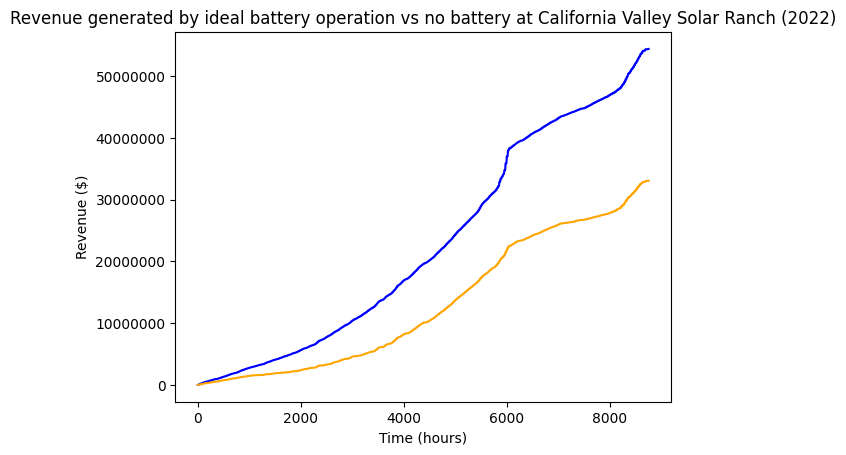

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(n),j, color='blue', label='Perfect Information')
plt.plot(range(n),l, color='orange', label='Predictive Model')
plt.ticklabel_format(style='plain')
plt.xlabel('Time (hours)')
plt.ylabel('Revenue ($)')
plt.title('Revenue generated by ideal battery operation vs no battery at California Valley Solar Ranch (2022)')

Text(0.5, 1.0, 'Hourly Revenue generated by ideal battery operation')

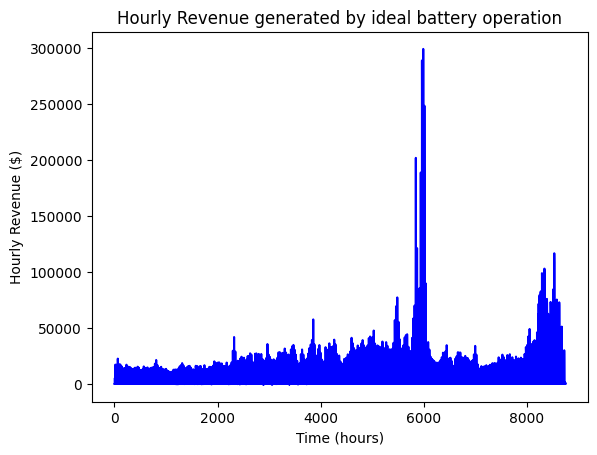

In [37]:
plt.plot(range(n),daily, color='blue', label='Perfect Information')
plt.xlabel('Time (hours)')
plt.ylabel('Hourly Revenue ($)')
plt.title('Hourly Revenue generated by ideal battery operation')

Text(0.5, 1.0, 'Revenue generated by ideal battery operation vs predictive model vs no battery at California Valley Solar Station (2022)')

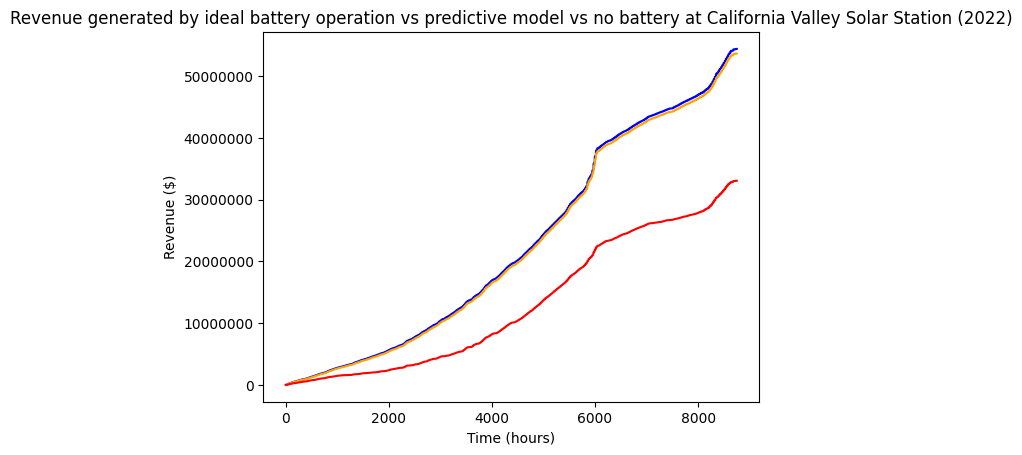

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(n),j, color='blue', label='Perfect Information')
plt.plot(range(n),m, color='orange', label='Predictive Model')
plt.plot(range(n),l, color='red', label='Predictive Model2')
plt.ticklabel_format(style='plain')
plt.xlabel('Time (hours)')
plt.ylabel('Revenue ($)')
plt.title('Revenue generated by ideal battery operation vs predictive model vs no battery at California Valley Solar Station (2022)')

In [54]:
test = [0 for i in range(24)]
test2 = [0 for i in range(24)]
for k in range(n):
  test[k%24] += d[k] + e[k] - r[k]
  test2[k%24] += e[k]

Text(0.5, 1.0, 'Energy dispatch vs time in predictive battery framework vs no battery (California Valley Solar Ranch 2022)')

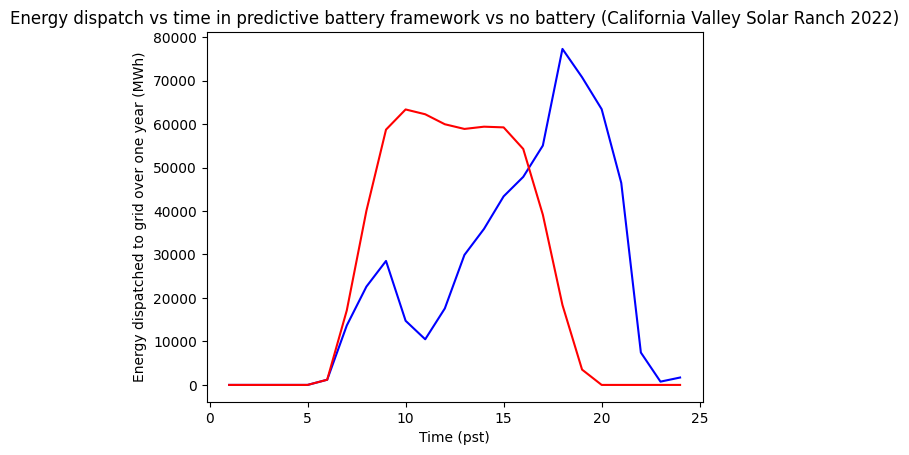

In [56]:
plt.plot(range(1,25),test, color='blue', label='Perfect Information')
plt.plot(range(1,25),test2, color='red', label='Perfect Information')
plt.xlabel('Time (pst)')
plt.ylabel('Energy dispatched to grid over one year (MWh)')
plt.title('Energy dispatch vs time in predictive battery framework vs no battery (California Valley Solar Ranch 2022)')

In [49]:

pric = x['prices'].values
d = x['d'].values
e = x['energyProd'].values
r = x['r_nc'].values
m = [0 for i in range(n)]
for i in range(n):
  sums = 0
  for k in range(i):
    daily2[k] = pric[k]*(d[k] + e[k] - r[k])
    sums += daily2[k]
  m[i] = sums

In [ ]:
 mappings_final.to_csv('/content/drive/My Drive/mappings_curtailment_final.csv')

In [ ]:
mappings_final = pd.read_csv('/content/drive/My Drive/mappings_curtailment5.csv')

In [ ]:
k_values = list(range(1,21))
k2 = list(range(1,21))
for i in k_values:
  k2[i-1] = (1.0123)**i

In [ ]:
sum(k2)

22.795834438876422

In [4]:
merged_df2 = pd.read_csv('/content/drive/My Drive/2021data.csv').drop_duplicates()
merged_df3 = pd.read_csv('/content/drive/My Drive/2020data.csv').drop_duplicates()
total_df = pd.concat([merged_df,merged_df2,merged_df3], ignore_index=True)


In [5]:
#feb-29
#3years of price data
import time
import requests
import zipfile
import pandas as pd
from io import BytesIO

specified_values = ['096WD_7_N001','24017_BLYTHESC_161_GUS1','2C559EQ2_7_N001','2C577C1_7_N001','2PBLSM34_7_N001','ACACIA_7_N001','ADERAG1_7_N001','AQUAWS_2_AQWSR1-APND','ARLNG2MV_7_N001','ASTORIA1_7_N001','ASTORIA2_7_N001','AVENGEN_7_N001','AVLYSLR_7_N005','BGSKYGN3_7_N001','BGSKYGN3_7_N001','BIGSK230_2_N025','BIGSK230_2_N025','BIGSK230_2_N025','BIGSKGN1_7_N001','BIGSKGN6_7_N001','BLACKWLL_7_N002','BLUESKY_7_N001','BLYTHESC_1_N008','BLYTHESC_1_N008','BORREGO_6_N009','BSKYNGSU_2_N002','BSKYNPM_7_N001','BSKYNPM_7_N003','BSKYNPM_7_N004','BSKYNPM_7_N005','BUCKWND_1_N201','GARNET_7_N008','C643TM1_7_N001','CABALLO3_7_N001','CANTGEN_7_N002','CATALNA2_7_N001','CAVLSRGN_7_B1','CENT403_7_N006','CENTANTE_7_N001','COLCT334_7_N001','COPUS_6_N001','CORCRAN2_7_N001','DAVIS_1_N030','DAWNLS_7_N001','DEVERS_1_N102','DEVERS_1_N103','DEVERS_2_N072','DMDVLY_1_UNITS-APND','DRYRANCH_7_N001','DUCORGN1_7_N001','DUCORGN2_7_N001','DUCORGN3_7_N001','DUCORGN4_7_N001','FBERBORD_1_N001','FNTRG1_7_N001','FRWTG1_7_N001','GASKW1B2_7_N003','GASLRAGN_7_N001','GASLRGN_7_N001','GATESBK4_7_N002','GATESBK4_7_N003','GIFFGEN_7_N001','GIFFGEN_7_N002','GIFFGEN_7_N002','GLDTGEN_7_N003','GNS1_7_B1','GUERSEY_7_N001','HENRTGEN_7_N001','HIDSRT_2_UNITS-APND','HURONGEN_7_ND002','INYOKERN_1_N008','ISIS_7_N002','KANSASGN_7_N002','LAMONT_1_N002','LEMORSLR_7_N003','LNGBATGN_7_N001','LOCKFORD_7_N004','LSQ855_7_N001','MAGUNDEN_1_N006','MESQSLR2_7_N002','MSOLGEN3_7_N003','NLANCRAN_7_N001','OASISG2_7_N001','OROLMGN_7_N005','PMPJKG2_7_N001','PNCHVS_2_SOLAR-APND','PTSB6_7_B2','Q1032C2_7_N001','Q442GEN_7_N005','Q442GEN_7_N012','Q482_7_N001','Q532C2_7_N001','Q548_7_N001','Q557_7_N005','Q620_7_N001','Q633C1_7_N001','Q643WC2_7_N001','Q643XC2_7_N001','Q644A2_7_N001','Q653B_7_N001','Q723EQ2_7_N001','Q965C2_7_N001','Q972GEN_7_N001','RICHMOND_1_GN001','RTEDDYG3_7_N003','RVRBANK_1_N010','S0479_7_N003','S473_7_N005','S621AC_7_N001','S621AC_7_N002','S622B_7_N003','S654_7_N001','SCHLNDLR_7_N002','SCHLNDLR_7_N002','SCHLNDLR_7_N003','SGSAVF1_7_N001','SGSAVF2_7_N001','SLATE_7_N001','SLSTR1_2_SOLAR1-APND','SLSTR2_2_SOLAR2-APND','STHKERN_7_N001','STROUD_6_N003','SUB434_7_N001','SUNRAY2_7_N001','SUNRAYGN_7_N001','SUNSPTA_7_N002','T0304_7_N003','TITANS34_7_N001','TOT427A_7_N001','TOT545L_7_N001','TWILGHTL_7_N001','VALTNEGN_7_N002','VALTNEGN_7_N003','VESTAL_6_N025','VICTOR_7_GN002','VICTOR_7_N008','VICTOR_7_N002','VICTOR_7_N006','VICTOR_7_N007','VICTOR_7_N009','VICTOR_7_N010','VICTOR_7_N011','WAUKENA_7_N003','WDT404L_7_N001','WLDWDG2_7_N001','WNSTRGN1_7_N001','WRGTSRGN_7_N001','BSKYNPM_7_N001','PURISIMA_1_N001','BSKYNPM_7_N001','PEWWOOD_7_B1','LSTHLLS_6_N001','OBERON_7_N182','OBERON_7_N182','24017_BLYTHESC_161_GUS1','24017_BLYTHESC_161_GUS1','LERDO_1_N004','ANTELOPE_6_N001','OBERON_7_N182','OBERON_7_N182','BIOMSJCT_6_GN001','BSKYNPM_7_N005','VALTNEGN_7_N002','Q442GEN_7_N012','DSRTHV3_7_N003']
url = 'http://oasis.caiso.com/oasisapi/SingleZip?resultformat=6&queryname=PRC_LMP&version=12&startdatetime='+str(2020)+'0229T08:00-0000&enddatetime='+str(2020)+'0301T08:00-0000&market_run_id=DAM&grp_type=ALL'
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
# Assuming there's only one file in the zip archive
  file_name = zip_file.namelist()[0]
  with zip_file.open(file_name) as csv_file:
    # Read the CSV file into pandas DataFrame
    df = pd.read_csv(csv_file)
  df = df[df['NODE'].isin(specified_values)]
total_df = pd.concat([total_df,df], ignore_index=True)
total_df = total_df.drop_duplicates()

In [ ]:
#testing per-year performance of predictive model in one location
import cvxpy as cp
import numpy as np
#mappings_final['predictive_value'] = 0
#mappings_final['no_battery'] = 0
for i,row in mappings_final.iterrows():
    if i != 21:
      continue
    df = pd.read_csv('/content/drive/My Drive/'+str(row['EIA ID'])+'_preds.csv')
    df_2022 = df[df['year']==2022][8:]
    energyProd = df_2022['gen_clean'].values
    energyPred = df_2022['EnergyPred'].values
    curtailment = df_2022['gen_curtailed'].fillna(0).values
    price_data = total_df[total_df["XML_DATA_ITEM"] == "LMP_PRC"]
    price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
    prices = price_data[price_data['NODE_ID'] == row['Nodes']]
    if m != 2022:
      prices = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values[:-8]
    else:
      prices = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values
    prices = np.array([0.1 if x < 0 else x for x in prices])
    off = 0
    qr_hat = row['Solar Capacity MW-AC']*0.6
    qd_hat = qr_hat
    s_hat = qr_hat*4
    s_t_final = [0 for i in range(len(prices))]
    qt_r_final = [0 for i in range(len(prices))]
    qt_d_final = [0 for i in range(len(prices))]
    while off+24 < len(prices):
      n = 24
      qt_d = cp.Variable(n)
      qt_r = cp.Variable(n)
      s_t = cp.Variable(n)
      prob1 = prices[0+off:24+off].T@qt_d
      prob2 = prices[0+off:24+off].T@qt_r

      consts2 = [s_t[i] == 1*s_t[i - 1] + 0.9025 *  qt_r[i] - qt_d[i] for i in range(1, n)
            ] + [s_t[i] == 0 for i in range(0, n, 24)
            ] + [qt_r[i] <= energyPred[i+off] for i in range(0, n)
            ] + [s_t <= s_hat,
                s_t[0] == 0,
                0 <= s_t,
                qt_r <= qr_hat,
                0 <= qt_r,
                qt_d <= qd_hat,
                0 <= qt_d,
                qt_d[0] == 0]


      prob = cp.Problem(cp.Maximize(prob1-prob2),
                      consts2)
      prob.solve()

      k = 0
      for j in range(24):
        if qt_r.value[j-k] <= energyProd[j+off]+curtailment[j+off]+0.001:
          s_t_final[j+off] = s_t.value[j-k]
          qt_r_final[j+off] = qt_r.value[j-k]
          qt_d_final[j+off] = qt_d.value[j-k]
        else:
          qt_r_final[j+off] = energyProd[j+off]+curtailment[j+off]
          qt_d_final[j+off] = qt_d.value[j-k]
          s_t_final[j+off] = max(s_t_final[j+off-1] + 0.9025 * qt_r_final[j+off] - qt_d_final[j+off],0)
          qt_d = cp.Variable(n-j)
          qt_r = cp.Variable(n-j)
          s_t = cp.Variable(n-j)
          prob1 = prices[j+off:24+off].T@qt_d
          prob2 = prices[j+off:24+off].T@qt_r

          consts2 = [s_t[i] == s_t[i - 1] + 0.9025 *  qt_r[i] - qt_d[i] for i in range(1, n-j)
            ] + [s_t[n-j-1] == 0
            ] + [qt_r[i] <= energyPred[j+i+off] for i in range(0, n-j)
            ] + [s_t <= s_hat,
                s_t[0] == s_t_final[j+off],
                qt_r[0] == qt_r_final[j+off],
                qt_d[0] == qt_d_final[j+off],
                0 <= s_t,
                qt_r <= qr_hat,
                0 <= qt_r,
                qt_d <= qd_hat,
                0 <= qt_d]

          prob = cp.Problem(cp.Maximize(prob1-prob2),
                      consts2)
          prob.solve()
          k = j
      off += 24
    mappings_final.loc[i,'predictive_value'] = prices.T@(qt_d_final) - prices.T@qt_r_final
    mappings_final.loc[i,'no_battery'] = prices.T@energyProd
    if i%5 == 0:
      mappings_final.to_csv('/content/drive/My Drive/mappings_final_predictive'+str(i)+'.csv')


In [ ]:
  mappings_final.to_csv('/content/drive/My Drive/mappings_final_predictivetest2.csv')


In [ ]:
#assumption 1, energy production level's will remain at a high level due to maintenance of solar panels over 20 years. Prices will rise at historical levels
#assumption 2, energy production level's will drop

-1.3695253680037741e-09

In [ ]:
for i,row in mappings_final.iterrows():
  df = pd.read_csv('/content/drive/My Drive/final gen data/'+str(row['EIA ID'])+'.csv')
  df = df.rename(columns={'Unnamed: 0': 'datetime'})
  df['datetime_no_year']= df['datetime'].apply(lambda x: x[5:])
  df['year'] = df['datetime'].apply(lambda x: x[0:4])
  df['EnergyMean'] = 0
  df['EnergyMean'] = df.groupby('datetime_no_year')['gen_clean'].transform(lambda x: x.expanding().mean())
  df['EnergyMean'].fillna(0, inplace=True)
  df.to_csv('/content/drive/My Drive/'+str(row['EIA ID'])+'_mod2.csv')


In [ ]:
mappings_final

,Unnamed: 0.1,Unnamed: 0,Project Name,EIA ID,Solar COD,Solar COD Year,Region,State,Latitude,Longitude,...,Solar Capacity MW-AC,ILR,Mount,Tracking Type,Tilt,Azimuth,improvement_value,battery_size,predictive_value,no_battery
0,0,0,Five Points Solar Station,57498,2011-09-01,2011,CAISO,CA,36.395531,-120.107800,...,15.0,1.173333,Fixed Tilt,Fixed Tilt,25,179,9.036450e+05,36.0,8.838981e+05,1.275796e+06
1,1,1,Westside Solar Station,57499,2011-09-13,2011,CAISO,CA,36.378471,-120.123910,...,15.0,1.232000,Fixed Tilt,Fixed Tilt,25,180,9.098342e+05,36.0,8.926126e+05,1.348846e+06
2,2,2,Stroud Solar Station,57497,2011-10-04,2011,CAISO,CA,36.523761,-120.123360,...,20.0,1.232000,Fixed Tilt,Fixed Tilt,25,181,1.260233e+06,48.0,1.234749e+06,1.753201e+06
3,3,3,Cantua Solar Station,57522,2012-07-25,2012,CAISO,CA,36.424571,-120.342960,...,20.0,1.290500,Fixed Tilt,Fixed Tilt,25,179,1.208643e+06,48.0,1.189414e+06,1.917100e+06
4,4,4,Giffen Solar Station,57521,2012-07-25,2012,CAISO,CA,36.527640,-120.311923,...,10.0,1.291000,Fixed Tilt,Fixed Tilt,25,179,8.719180e+05,24.0,8.599871e+05,3.924925e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,117,CED Panoche Valley Solar Project,57340,2018-01-31,2018,CAISO,CA,36.634821,-120.885571,...,140.0,1.342857,Tracking,Single Axis,Tracking,180,8.774334e+06,336.0,8.604605e+06,1.813518e+07
115,115,118,RE Gaskell West 1,61445,2018-03-31,2018,CAISO,CA,34.834851,-118.556470,...,20.0,1.400000,Tracking,Single Axis,Tracking,180,1.314625e+06,48.0,1.288453e+06,3.265655e+06
116,116,119,Great Valley Solar 1-4 (Tranquility 8),59940,2018-04-30,2018,CAISO,CA,36.576661,-120.390241,...,200.0,1.405000,Tracking,Single Axis,Tracking,180,1.204272e+07,480.0,1.184390e+07,3.049294e+07
117,117,120,Antelope Expansion 2,61264,2018-12-31,2018,CAISO,CA,34.752930,-118.317900,...,105.0,1.238095,Tracking,Single Axis,Tracking,180,7.037478e+06,252.0,6.765399e+06,1.517957e+07


In [ ]:
#Average energy production, 2022 prices increasing
#Optimal Battery Model
 # Import packages.
import cvxpy as cp
import numpy as np
for i,row in mappings_final.iterrows():
    if i <= 0:
      continue
    df = pd.read_csv('/content/drive/My Drive/'+str(row['EIA ID'])+'_mod2.csv')
    df_2022 = df[df['year']==2022][8:]
    energyProd = df_2022['EnergyMean'].values
    curtailment = df_2022['gen_curtailed'].fillna(0).values
    price_total = [0 for i in range(8752)]
    price_data = total_df[total_df["XML_DATA_ITEM"] == "LMP_PRC"]
    price_data = price_data[['INTERVALSTARTTIME_GMT','OPR_DT','NODE_ID','MW']].sort_values(by='INTERVALSTARTTIME_GMT')
    price_data = price_data[price_data['OPR_DT'] != '2020-02-29']
    prices = price_data[price_data['NODE_ID'] == row['Nodes']]
    for m in range(2020,2023):
        if m != 2022:
          prices2 = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values[:-8]
        else:
          prices2 = prices.loc[prices['OPR_DT'].str[0:4] == str(m)]['MW'].values
        prices_non_negative = np.array([0 if x < 0 else x for x in prices2])
        price_total = price_total + prices_non_negative*(1.0335)**(2022-m)
    prices = price_total/3
    n = len(prices)
    qt_d = cp.Variable(n)
    qt_r = cp.Variable(n)
    qt_r_no_curtailmen
    s_t = cp.Variable(n)

    s_hat = cp.Variable(1)
    qr_hat = s_hat*0.25
    qd_hat = s_hat*0.25
    prob1 = (prices.T@qt_d)
    prob2 = (prices.T@qt_r)
    prob3 = prices.T@(energyProd)


    consts2 = [s_t[i] == s_t[i - 1] + 0.9025 *  qt_r[i] - qt_d[i] for i in range(1, n)
          ] + [s_t[i] == 0 for i in range(0, n, 24)
          ] + [qt_r[i] <= energyProd[i] for i in range(0, n)
          ] + [qt_d[i] *prices[i] >= 0 for i in range(0, n)
          ] + [s_t <= s_hat,
              s_t[0] == 0,
              0 <= s_t,
              qt_r <= qr_hat,
              0 <= qt_r,
              qt_d <= qd_hat,
              0 <= qt_d,
              qt_d[0]==0]


    prob = cp.Problem(cp.Maximize(22.80*(prob1-prob2) - 0.6*681917*s_hat),consts2)
    prob.solve()
    mappings_final.loc[i,'avg_price_avg_energy_perfect_improvement'] = prob.value
    mappings_final.loc[i,'battery_size_avgprice_avgenergy_perf'] = s_hat.value[0]
    if i%5 == 0:
      mappings_final.to_csv('/content/drive/My Drive/mappings_final_twenty_year'+str(i)+'.csv')
#declining energy production, 2022 prices increasing overtime
#average energy production, average prices not increasing overtime
#declining energy production, average prices not increasing overtime
#seriously declining eergy production

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
      mappings_final.to_csv('/content/drive/My Drive/mappings_final_twenty_year'+str(i)+'.csv')


In [ ]:
import cvxpy as cp
import numpy as np
mappings_final = pd.read_csv('/content/drive/My Drive/mappings_final_twenty_year45.csv')

In [ ]:
i


107